<h1 style="color:darkslateblue">Importing the required libraries</h1>

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import datetime as dt

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<h1 style = 'color:darkslateblue'>Reading the csv file using pandas</h1>

In [8]:
bank_df = pd.read_csv("bank.csv",delimiter=";")

In [9]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
bank_df.shape

(4521, 17)

In [11]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [12]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<h3>Currency is assumed to be euros</h3>

In [14]:
bank_df['recently_contacted'] = bank_df['pdays'].apply(lambda x: 1 if x >= 0 and x <= 30 else 0)

In [15]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,recently_contacted
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


<h1 style = "color:darkslateblue">Featuring the Previously contacted</h1>

In [17]:
bank_df['pdays_group'] = pd.cut(bank_df['pdays'], bins=[-2, 0, 30, 60, 180, 365, 1000],
                           labels=["Never", "0–30", "31–60", "61–180", "181–365", "365+"])


In [18]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,recently_contacted,pdays_group
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,Never
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,181–365
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,181–365
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,Never
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,Never


In [19]:
bank_df_copy = bank_df.copy()

In [20]:
bank_df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,recently_contacted,pdays_group
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,Never
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,181–365
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,181–365
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,Never
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,Never


In [21]:
bank_df_copy=bank_df_copy.drop(['duration','pdays'],axis=1)

In [22]:
bank_df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,recently_contacted,pdays_group
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,0,unknown,no,0,Never
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,4,failure,no,0,181–365
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,1,failure,no,0,181–365
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,0,unknown,no,0,Never
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,0,unknown,no,0,Never


In [23]:
bank_df_copy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'previous', 'poutcome',
       'y', 'recently_contacted', 'pdays_group'],
      dtype='object')

In [24]:
bank_df_copy = bank_df_copy[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'previous','recently_contacted','pdays_group', 'poutcome',
       'y']]

In [25]:
bank_df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,recently_contacted,pdays_group,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,0,0,Never,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,4,0,181–365,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,1,0,181–365,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,0,0,Never,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,0,0,Never,unknown,no


<h1 style = "color:darkslateblue">EDA(visualization)</h1>

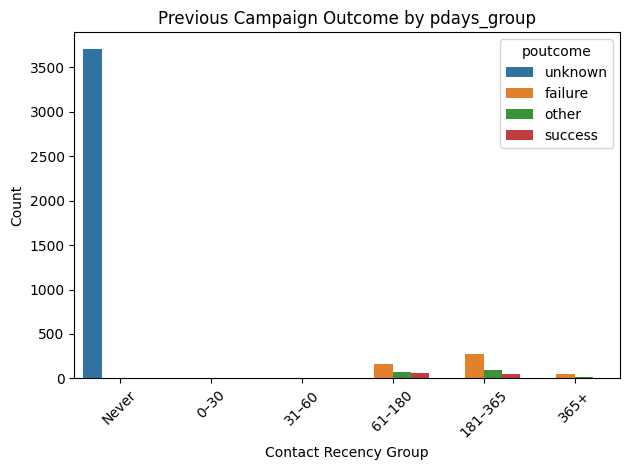

In [27]:
sns.countplot(x='pdays_group', hue='poutcome', data=bank_df_copy)
plt.title('Previous Campaign Outcome by pdays_group')
plt.xlabel('Contact Recency Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='poutcome')
plt.tight_layout()
plt.show()

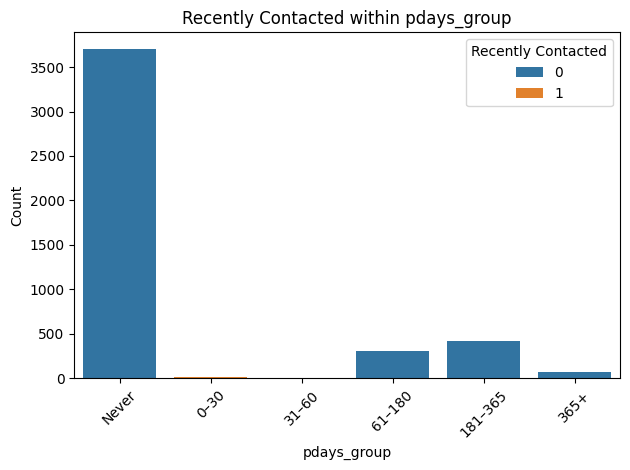

In [28]:
sns.countplot(x='pdays_group', hue='recently_contacted', data=bank_df_copy)
plt.title('Recently Contacted within pdays_group')
plt.xlabel('pdays_group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Recently Contacted')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Target Variable Distribution (Subscribed or Not)')

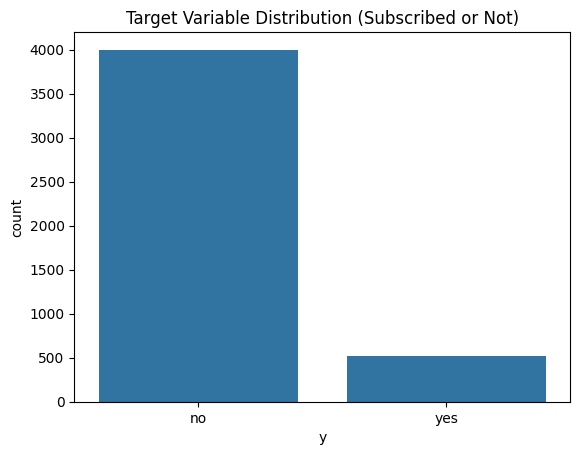

In [29]:
sns.countplot(x='y', data=bank_df_copy)
plt.title('Target Variable Distribution (Subscribed or Not)')


Text(0.5, 1.0, 'Age Distribution')

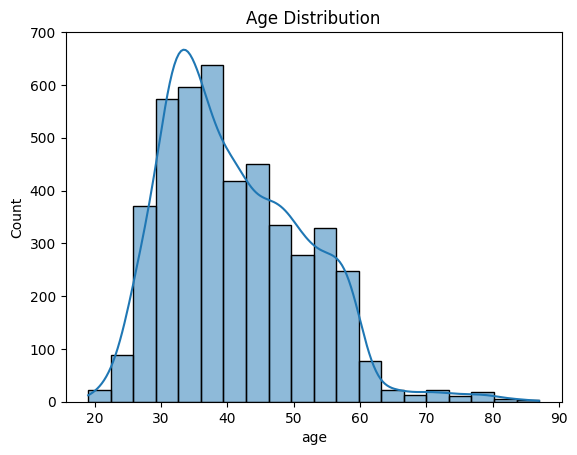

In [30]:
sns.histplot(bank_df_copy['age'], bins=20, kde=True)
plt.title('Age Distribution')


Text(0.5, 1.0, 'Job vs Subscription')

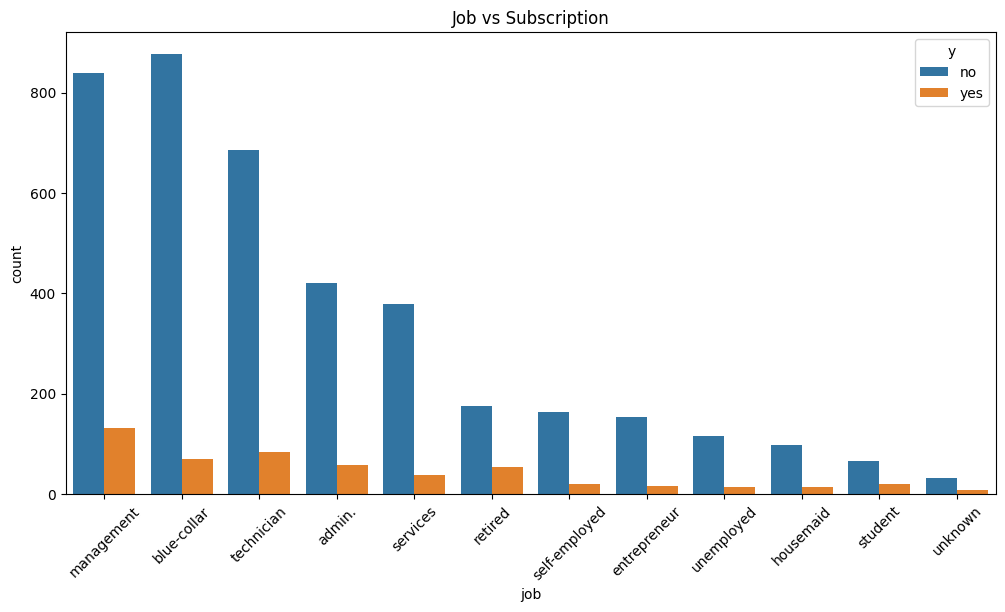

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=bank_df_copy, x='job', hue='y', order=bank_df_copy['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Job vs Subscription')

Text(0.5, 1.0, 'Education Level vs Subscription')

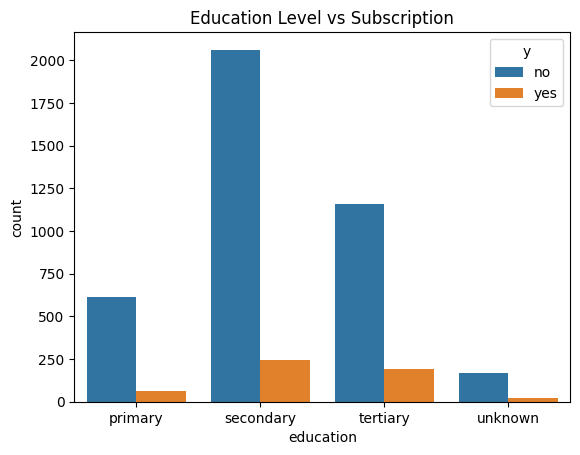

In [32]:
sns.countplot(data=bank_df_copy, x='education', hue='y')
plt.title('Education Level vs Subscription')


Text(0.5, 1.0, 'Marital Status vs Subscription')

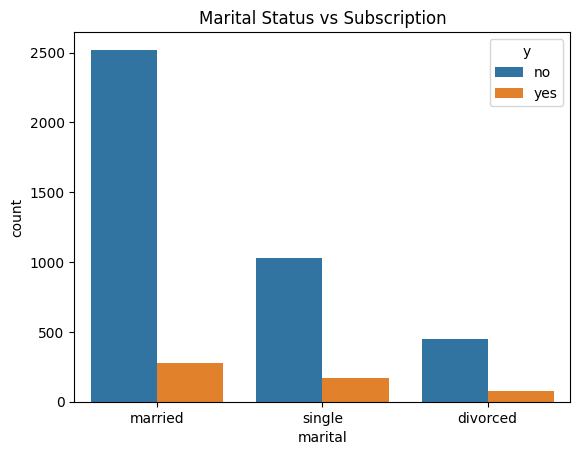

In [33]:
sns.countplot(data=bank_df_copy, x='marital', hue='y')
plt.title('Marital Status vs Subscription')

Text(0.5, 1.0, 'Balance vs Subscription')

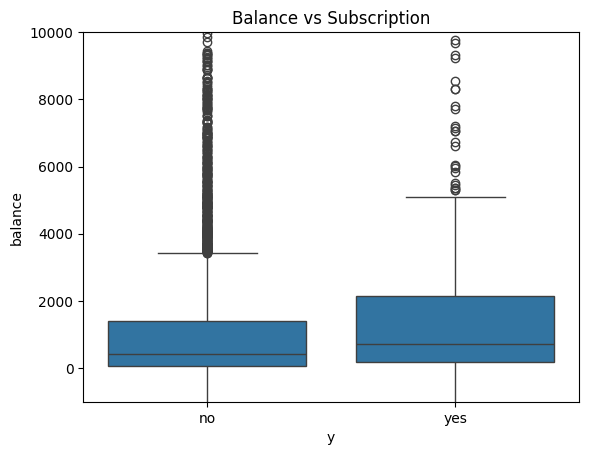

In [34]:
sns.boxplot(x='y', y='balance', data=bank_df_copy)
plt.ylim(-1000, 10000)
plt.title('Balance vs Subscription')


Text(0.5, 1.0, 'Number of Contacts During Campaign vs Subscription')

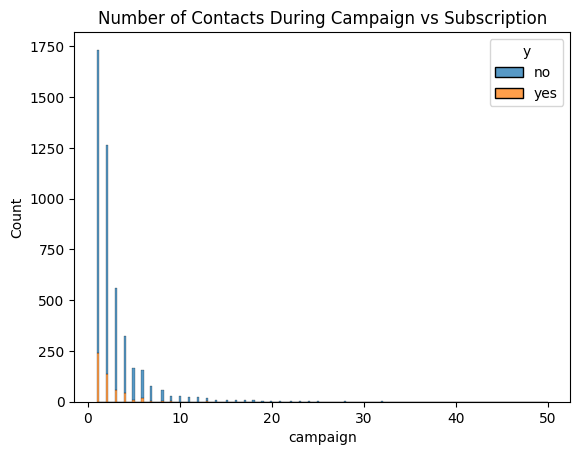

In [35]:
sns.histplot(data=bank_df_copy, x='campaign', hue='y', multiple='stack')
plt.title('Number of Contacts During Campaign vs Subscription')

Text(0.5, 1.0, 'Time Since Last Contact vs Subscription')

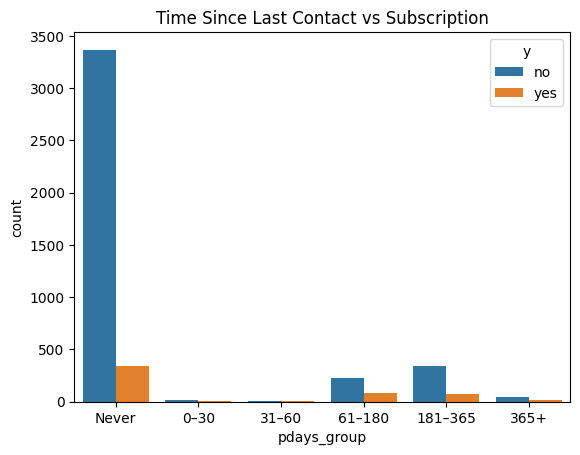

In [36]:
sns.countplot(x='pdays_group', hue='y', data=bank_df_copy)
plt.title('Time Since Last Contact vs Subscription')


Text(0.5, 1.0, 'Previous Campaign Outcome vs Current Subscription')

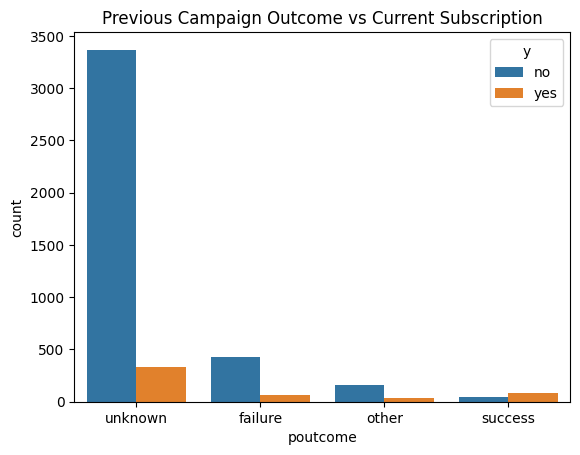

In [37]:
sns.countplot(data=bank_df_copy, x='poutcome', hue='y')
plt.title('Previous Campaign Outcome vs Current Subscription')

In [38]:
bank_df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,recently_contacted,pdays_group,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,0,0,Never,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,4,0,181–365,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,1,0,181–365,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,0,0,Never,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,0,0,Never,unknown,no


<h1 style = "color:purple">Feature Engineering</h1>

In [40]:
def calculate_call_success_ratio(row):
    if row['previous'] > 0 and row['poutcome'] == 'success':
        return 1
    else:
        return 0

bank_df_copy['call_success_ratio'] = bank_df_copy.apply(calculate_call_success_ratio, axis=1)


In [41]:
bank_df_copy['call_success_ratio'].sum()

129

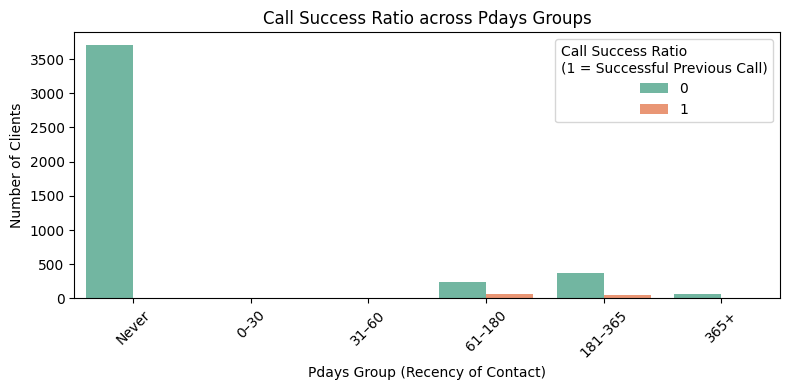

In [42]:
plt.figure(figsize=(8,4))
sns.countplot(data=bank_df_copy, x='pdays_group', hue='call_success_ratio', palette='Set2')

plt.title('Call Success Ratio across Pdays Groups')
plt.xlabel('Pdays Group (Recency of Contact)')
plt.ylabel('Number of Clients')
plt.legend(title='Call Success Ratio\n(1 = Successful Previous Call)', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

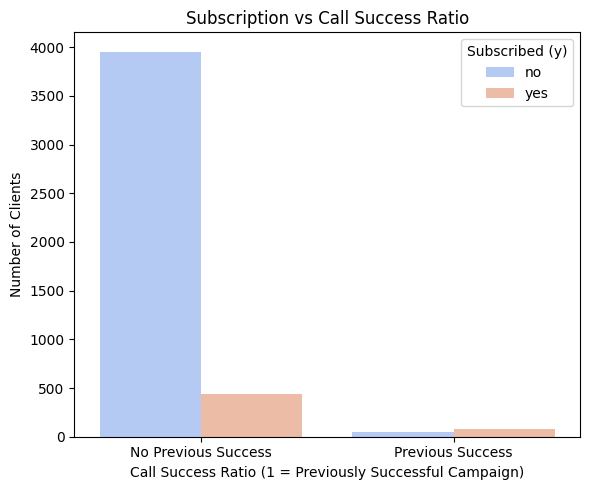

In [43]:
plt.figure(figsize=(6,5))
sns.countplot(data=bank_df_copy, x='call_success_ratio', hue='y', palette='coolwarm')

plt.title('Subscription vs Call Success Ratio')
plt.xlabel('Call Success Ratio (1 = Previously Successful Campaign)')
plt.ylabel('Number of Clients')
plt.legend(title='Subscribed (y)')
plt.xticks([0, 1], ['No Previous Success', 'Previous Success'])
plt.tight_layout()
plt.show()

In [44]:
bank_df_copy['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [45]:
bank_df_copy[
    (bank_df_copy['y'] == 'yes') &
    (bank_df_copy['call_success_ratio'] == 1) &
    (bank_df_copy['poutcome'] == 'success')
].shape[0]

83

In [46]:
bank_df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,recently_contacted,pdays_group,poutcome,y,call_success_ratio
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,0,0,Never,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,4,0,181–365,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,1,0,181–365,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,0,0,Never,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,0,0,Never,unknown,no,0


<h1 style = "color:darkslateblue">Building the decision tree for prediction weather customer will subscribe or not</h1>

<h2 style="color:purple">Importing the ml libraries</h2>

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
df = bank_df_copy.copy()

<h2 style= 'color:purple'>Encoding the categorical data</h2>

In [52]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [53]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,recently_contacted,pdays_group,poutcome,y,call_success_ratio
0,30,10,1,0,0,1787,0,0,0,19,10,1,0,0,Never,3,0,0
1,33,7,1,1,0,4789,1,1,0,11,8,1,4,0,181–365,0,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,1,1,0,181–365,0,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,4,0,0,Never,3,0,0
4,59,1,1,1,0,0,1,0,2,5,8,1,0,0,Never,3,0,0


In [54]:
df['job'].unique()

array([10,  7,  4,  1,  6,  9,  2,  0,  8,  3,  5, 11])

<h2 style = 'color:purple'>Splitting the test and the target value</h2>

In [56]:
df['p_days'] = bank_df['pdays']
df = df.drop('pdays_group',axis=1)
X = df.drop('y', axis=1)
y = df['y']  # 0 = no, 1 = yes (because of LabelEncoder)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3 style = 'color:red'>Test dataset</h3>

In [58]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,recently_contacted,poutcome,call_success_ratio,p_days
0,30,10,1,0,0,1787,0,0,0,19,10,1,0,0,3,0,-1
1,33,7,1,1,0,4789,1,1,0,11,8,1,4,0,0,0,339
2,35,4,2,2,0,1350,1,0,0,16,0,1,1,0,0,0,330
3,30,4,1,2,0,1476,1,1,2,3,6,4,0,0,3,0,-1
4,59,1,1,1,0,0,1,0,2,5,8,1,0,0,3,0,-1


<h3 style = 'color:red'>Target dataset</h3>

In [60]:
y.unique()

array([0, 1])

In [61]:
y.sum()

521

<h1 style = 'color:darkslateblue'>Traing the decision tree classifier</h2>

In [126]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

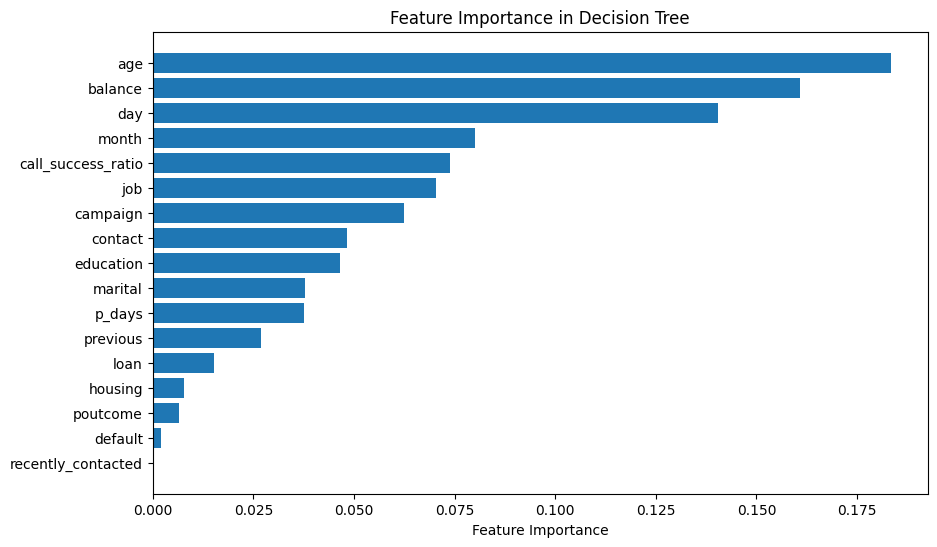

In [134]:
importances = clf.feature_importances_
features = X_train.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.barh(range(len(features)), importances[sorted_indices])
plt.yticks(range(len(features)), features[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()


<h1 style='color:darkslateblue'>Model accuracy</h1>

In [136]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train balanced Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_res, y_res)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.84      0.87       807
           1       0.19      0.32      0.24        98

    accuracy                           0.78       905
   macro avg       0.55      0.58      0.56       905
weighted avg       0.83      0.78      0.80       905



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


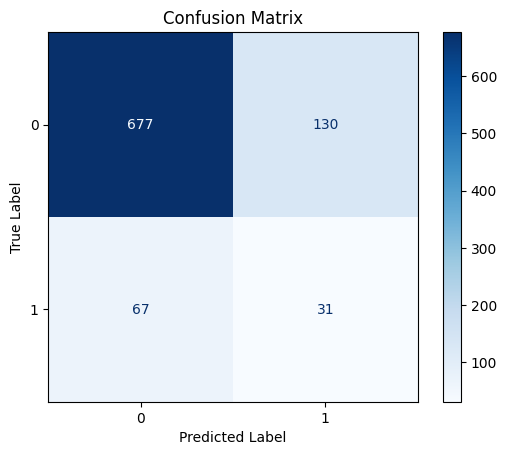

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


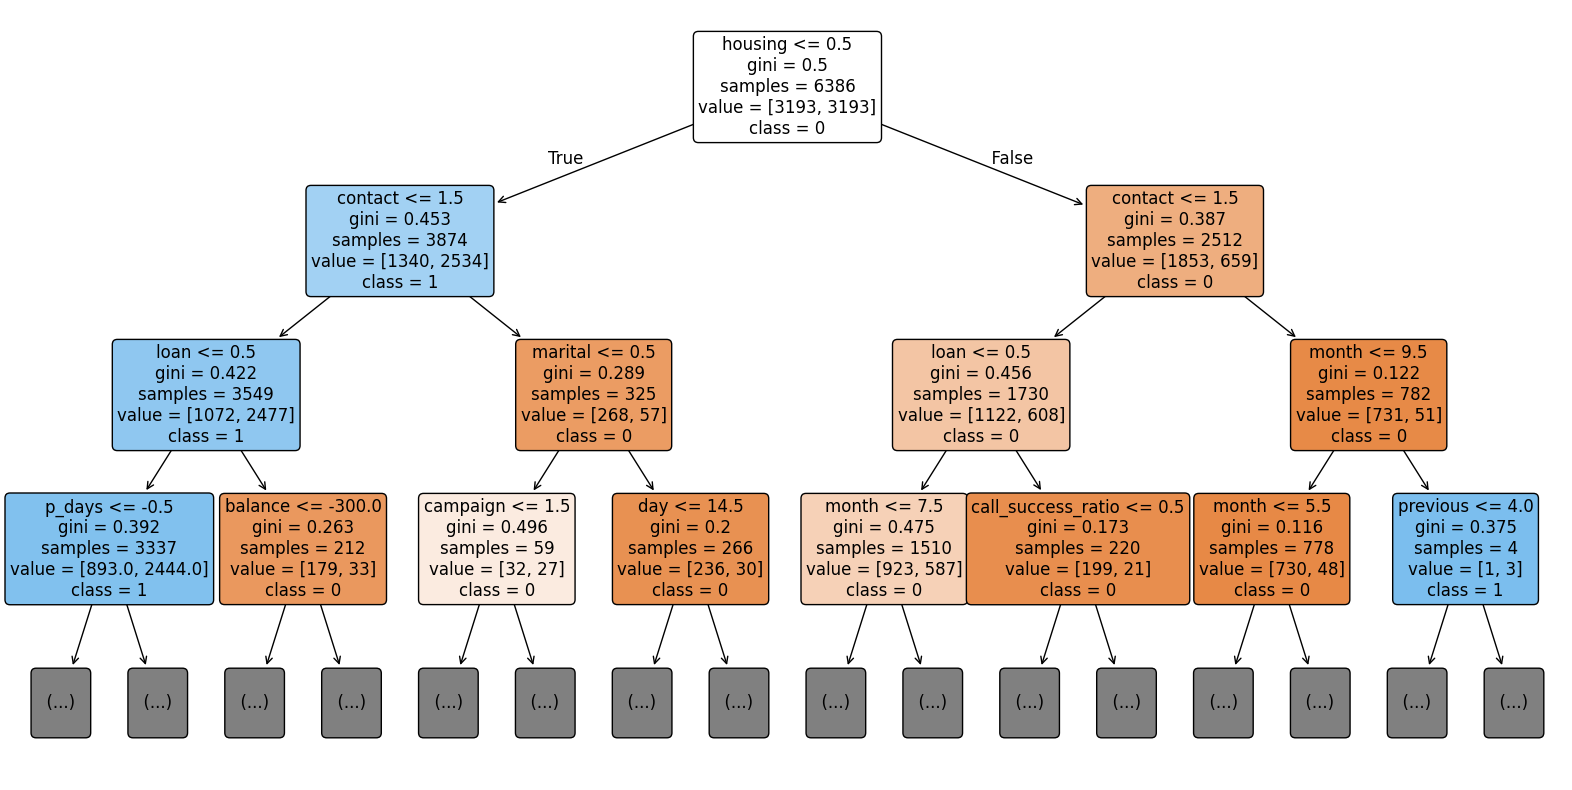

In [146]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=[str(cls) for cls in clf.classes_], 
          filled=True, 
          rounded=True, 
          max_depth=3,     # Controls density
          fontsize=12)
plt.show()
